CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [2]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())


   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Last Played</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    <li>Last Played: Recent use to identify current trends.</li>
    </ul>
</li>
<li>
Performance indicator:
    <ul>
    <li>Perf Rating and Avg Player Rating: average success and skill level associated with the openings.</li>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    </ul>
</li>
</ol>

In [3]:
# add a column to the dataframe
df['num_moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# add the data last_played, a number of days since the last played game
df['Last_played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [4]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Last_played', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','num_moves']

data = df[selected_variable]

print(data.head())


                                             Opening Colour  Num Games  \
0                 Alekhine Defense, Balogh Variation  white        692   
1               Alekhine Defense, Brooklyn Variation  black        228   
2               Alekhine Defense, Exchange Variation  white       6485   
3                Alekhine Defense, Four Pawns Attack  white        881   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259   

   Last_played  Perf Rating  Avg Player  Player Win %  Draw %  Opponent Win %  \
0         2134         2247        2225          40.8    24.3            35.0   
1         2129         2145        2193          29.8    22.4            47.8   
2         2120         2244        2194          40.8    27.7            31.5   
3         2136         2187        2130          39.7    23.2            37.1   
4         2167         2122        2178          37.8    21.2            40.9   

   num_moves  
0          7  
1          4  
2          9  
3       

In [5]:
# Imputation of Missing Data if needed

# Check for missing values
print(data.isnull().sum())


Opening           0
Colour            0
Num Games         0
Last_played       0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
num_moves         0
dtype: int64


No missing data

looking for correlation

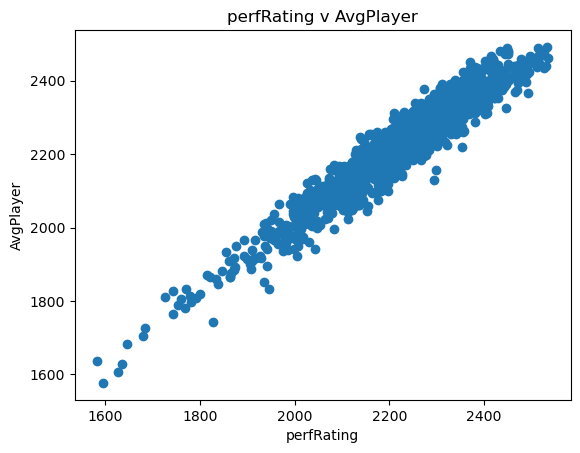

PearsonRResult(statistic=0.9542940663972459, pvalue=0.0)


In [6]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np

plt.title("perfRating v AvgPlayer")
plt.xlabel("perfRating")
plt.ylabel("AvgPlayer")
plt.scatter(data['Perf Rating'], data['Avg Player'])
plt.show()

corr = pearsonr(data['Perf Rating'], data['Avg Player'])
print(corr)

The average rating seems to be highly correlated with the performance rating, I will use the performance rating for the effectiveness index and remove the average rating to avoid multicollinearity.


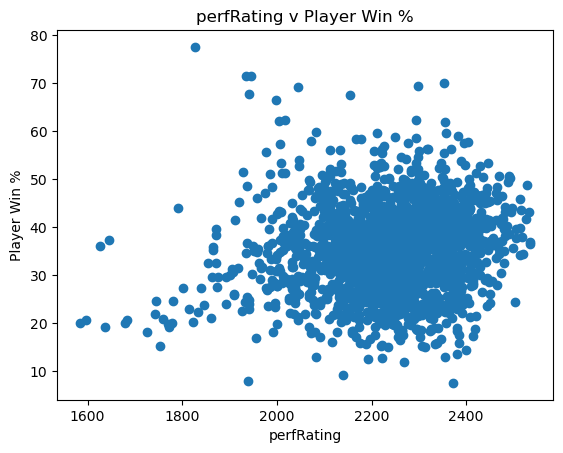

PearsonRResult(statistic=0.11582083724744513, pvalue=4.634750098109359e-07)


In [7]:
plt.title("perfRating v Player Win %")
plt.xlabel("perfRating")
plt.ylabel("Player Win %")
plt.scatter(data['Perf Rating'], data['Player Win %'])
plt.show()

corr = pearsonr(data['Perf Rating'], data['Player Win %'])
print(corr)

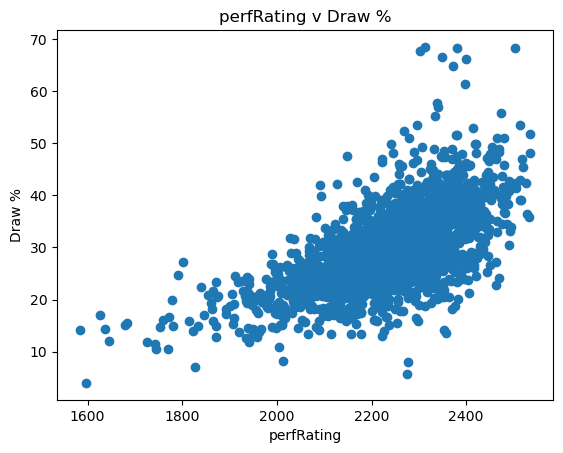

PearsonRResult(statistic=0.6304926904333537, pvalue=2.4539318506598297e-209)


In [8]:
plt.title("perfRating v Draw %")
plt.xlabel("perfRating")
plt.ylabel("Draw %")
plt.scatter(data['Perf Rating'], data['Draw %'])
plt.show()

corr = pearsonr(data['Perf Rating'], data['Draw %'])
print(corr)

We can see that the performance rating doesn't have a strong correlation with the win or draw pourcentage.

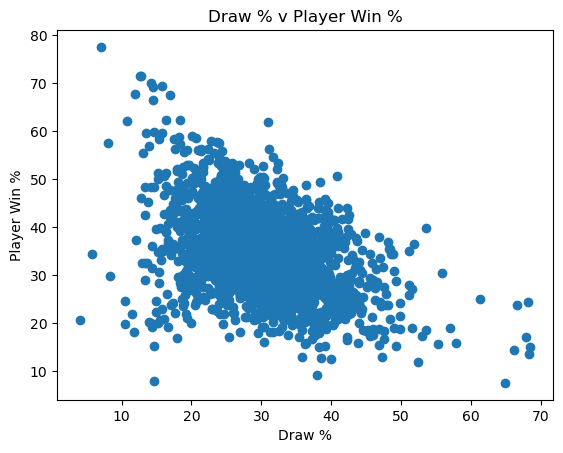

PearsonRResult(statistic=-0.4302600400955256, pvalue=9.270625196774843e-86)


In [9]:
plt.title("Draw % v Player Win %")
plt.xlabel("Draw %")
plt.ylabel("Player Win %")
plt.scatter(data['Draw %'], data['Player Win %'])
plt.show()

corr = pearsonr(data['Draw %'], data['Player Win %'])
print(corr)

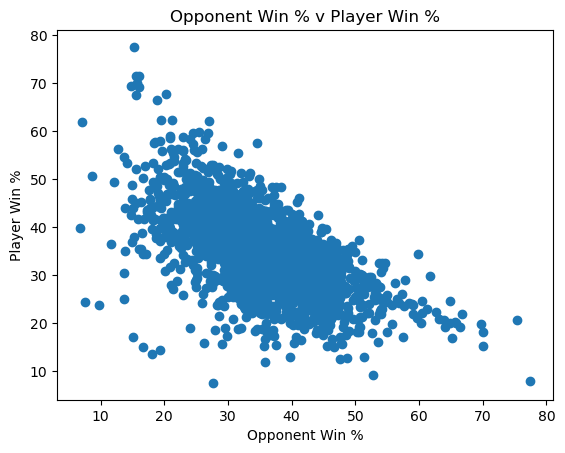

PearsonRResult(statistic=-0.6119189973077044, pvalue=5.799913811048905e-194)


In [10]:
plt.title("Opponent Win % v Player Win %")
plt.xlabel("Opponent Win %")
plt.ylabel("Player Win %")
plt.scatter(data['Opponent Win %'], data['Player Win %'])
plt.show()

corr = pearsonr(data['Opponent Win %'], data['Player Win %'])
print(corr)


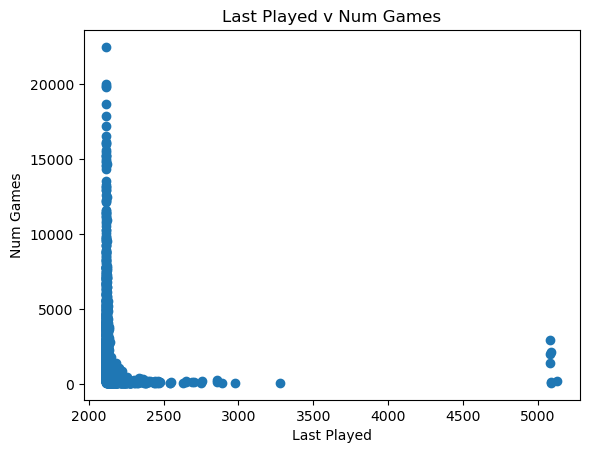

PearsonRResult(statistic=-0.0953319990007404, pvalue=3.4042532064717565e-05)


In [11]:
plt.title("Last Played v Num Games")
plt.xlabel("Last Played")
plt.ylabel("Num Games")
plt.scatter(data['Last_played'], data['Num Games'])
plt.show()

corr = pearsonr(data['Last_played'], data['Num Games'])
print(corr)

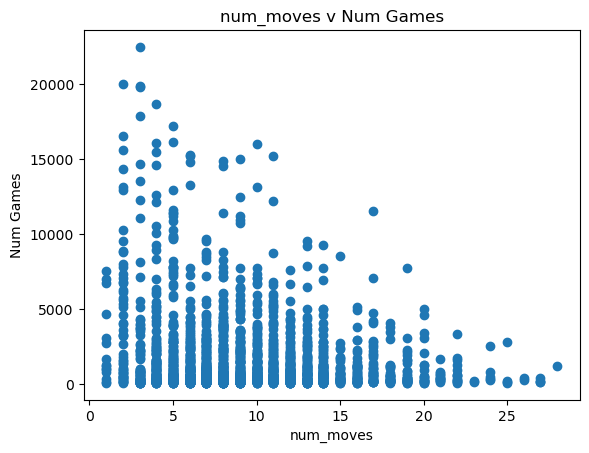

PearsonRResult(statistic=-0.21344080883319613, pvalue=7.504975428374275e-21)


In [12]:
plt.title("num_moves v Num Games")
plt.xlabel("num_moves")
plt.ylabel("Num Games")
plt.scatter(data['num_moves'], data['Num Games'])
plt.show()

corr = pearsonr(data['num_moves'], data['Num Games'])
print(corr)

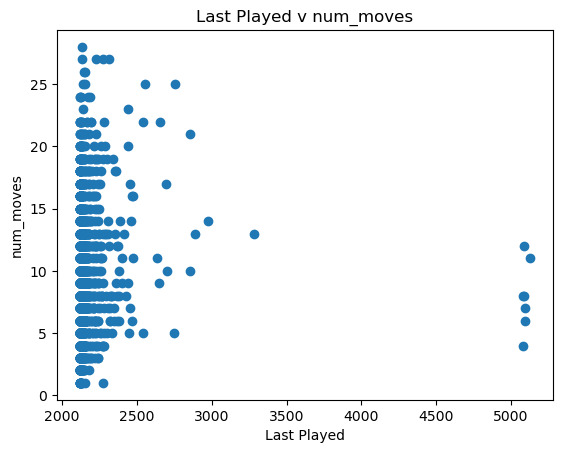

PearsonRResult(statistic=0.04031369530777494, pvalue=0.08022733764472718)


In [13]:
plt.title("Last Played v num_moves")
plt.xlabel("Last Played")
plt.ylabel("num_moves")
plt.scatter(data['Last_played'], data['num_moves'])
plt.show()

corr = pearsonr(data['Last_played'], data['num_moves'])
print(corr)

It look like number of games, last played and number of moves are correlated, i will maybe need to merge the popularity and complexity index into one.

The games not played since more than 4000 look like outliers, I will remove them.

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(data[['Perf Rating']], data['Player Win %'])
r_sq = model.score(data[['Perf Rating']], data['Player Win %'])
print(r_sq)



0.013414466340699316


In [16]:
import statsmodels.api as sm

perf_rating = data['Perf Rating']

perf_rating = sm.add_constant(perf_rating)
model = sm.OLS(data['Player Win %'], perf_rating)
results = model.fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     25.59
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.63e-07
Time:                        12:02:56   Log-Likelihood:                -6815.7
No. Observations:                1884   AIC:                         1.364e+04
Df Residuals:                    1882   BIC:                         1.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.7803      3.442      5.166      